**Import all libraries that you will need**

In [1]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import wptools
import json
import seaborn as sns # --> to show your visualizations in the seaborn frame 
import matplotlib.pyplot as plt
# It helps you make your visalization faster, but if you wanna more details go to matplotlib (previous line)
%matplotlib inline

# Gathering

- twitter-archive-enhanced.csv
- image predictions by `requests`
- retweets and favourites (likes) by `API - tweepy`

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### image predictions

In [3]:
folder_name = 'image_predictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
tsv_file = os.listdir(folder_name)[0]
tsv_file

'image-predictions.tsv'

In [4]:
df_img_predictions = pd.read_csv(folder_name + '/' + tsv_file, sep='\t')
df_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### retweets and favourites (likes)

In [5]:
consumer_key = 'XXXX'
consumer_secret = 'XXXX'
access_token = 'XXXX'
access_secret = 'XXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
tweet_ids = list(df_twitter_archive['tweet_id'])

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        
    except:
        print("You have an error with this tweet's id: " + str(tweet))

You have an error with this tweet's id: 888202515573088257
You have an error with this tweet's id: 873697596434513921
You have an error with this tweet's id: 872668790621863937
You have an error with this tweet's id: 872261713294495745
You have an error with this tweet's id: 869988702071779329
You have an error with this tweet's id: 866816280283807744
You have an error with this tweet's id: 861769973181624320
You have an error with this tweet's id: 856602993587888130
You have an error with this tweet's id: 851953902622658560
You have an error with this tweet's id: 845459076796616705
You have an error with this tweet's id: 844704788403113984
You have an error with this tweet's id: 842892208864923648
You have an error with this tweet's id: 837366284874571778
You have an error with this tweet's id: 837012587749474308
Rate limit reached. Sleeping for: 180
You have an error with this tweet's id: 829374341691346946
You have an error with this tweet's id: 827228250799742977
You have an error 

In [7]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)
    
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})

In [8]:
df_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
df_tweets.sample(10)

,tweet_id,retweets,favorites
414,821044531881721856,2218,12437
1044,740373189193256964,12742,33769
592,797236660651966464,6452,19686
1553,687399393394311168,590,1828
2072,670733412878163972,470,895
577,798701998996647937,7638,0
2158,668989615043424256,303,622
1099,730427201120833536,989,3351
710,782021823840026624,6059,0
1114,728035342121635841,1593,4368


In [9]:
df_tweets.shape

(2331, 3)

# Assessment

### Twitter archived data

In [10]:
df_twitter_archive.shape

(2356, 17)

In [11]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1428,697616773278015490,NaN,NaN,2016-02-11 03:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doubles as a hallway rug. Very rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697616773...,11,10,None,None,None,pupper,None
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
459,817827839487737858,NaN,NaN,2017-01-07 20:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He ran into a glass door once. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,None,None,None,None
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None


In [14]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [17]:
df_twitter_archive['name'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351

In [18]:
sum(df_twitter_archive['expanded_urls'].duplicated())

137

In [19]:
df_twitter_archive['expanded_urls'][926]

'https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/679158373988876288/photo/1'

### Image predictions data

In [20]:
df_img_predictions.shape

(2075, 12)

In [21]:
df_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df_img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
df_img_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,goose,0.214301,False,gibbon,0.084253,False,pizza,0.080168,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
115,667937095915278337,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,1,hamster,0.172078,False,guinea_pig,0.094924,False,Band_Aid,0.059995,False
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True


In [24]:
df_img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
df_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Tweets data

In [26]:
df_tweets.to_csv(r'C:\Users\Taha CompuTech\Desktop\tweets.csv', index = False)

In [27]:
df_tweets.shape

(2331, 3)

In [28]:
df_tweets.head()

,tweet_id,retweets,favorites
0,892420643555336193,7378,35075
1,892177421306343426,5497,30368
2,891815181378084864,3633,22831
3,891689557279858688,7555,38351
4,891327558926688256,8141,36629


In [29]:
df_tweets.tail()

,tweet_id,retweets,favorites
2326,666049248165822465,38,94
2327,666044226329800704,122,260
2328,666033412701032449,39,107
2329,666029285002620928,41,118
2330,666020888022790149,444,2345


In [30]:
df_tweets.sample(10)

,tweet_id,retweets,favorites
816,767500508068192258,2270,7322
710,782021823840026624,6059,0
1277,707629649552134146,829,2474
985,747512671126323200,1549,5346
644,790987426131050500,2093,9693
1924,673689733134946305,597,1628
739,778408200802557953,4199,13354
2076,670691627984359425,221,549
1661,681654059175129088,868,2524
2002,671874878652489728,506,1169


In [31]:
df_tweets.describe()

,retweets,favorites
count,2331.000000,2331.000000
mean,2594.169026,7324.620335
std,4388.490717,11375.942509
min,1.000000,0.000000
25%,526.000000,1270.500000
50%,1210.000000,3180.000000
75%,3004.500000,8953.500000
max,74460.000000,150822.000000


In [32]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## Issues

**`Twitter archived data`**
#### Quality
* There are five columns have many NaN values (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
* The `text` column shows that there are some tweets which is retweeted tweets and mentions tweets
* Dog names some of them are missed and others are incorrect
* These columns(`tweet_id`, `timestamp`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`) have an incorrect data type.
* `expanded_urls` column somtimes have more than repeated url and somtimes have different urls (splitted by ',')
* These two columns have invalid and incorrect values `rating_numerator` / `rating_denominator`
* `source` column has no varaity so it does not matter

#### Tidiness
* timestamp column contains year, month, day, and the time
* These columns (`doggo` , `floofer` , `pupper` , `puppo`) should become in the same column
* `tweet_id`column is common in the three data sets
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

**`Image predictions data`**
#### Quality
* `tweet_id` column is int data type

#### Tidiness
* None
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

**`Tweets data`**
#### Quality
* retweets and favorites are float

#### Tidiness
* None

# Cleaning

In [33]:
twitter_archive_clean = df_twitter_archive.copy()
img_predictions_clean = df_img_predictions.copy()
tweets_clean = df_tweets.copy()

#### Define
* convert all ids features from float to string
* convert timestamp and retweeted_status_timestamp from object to datetime

#### Code

In [34]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype(str)
twitter_archive_clean['retweeted_status_id'] = twitter_archive_clean['retweeted_status_id'].astype(str)
twitter_archive_clean['retweeted_status_user_id'] = twitter_archive_clean['retweeted_status_user_id'].astype(str)

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

#### test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

#### Define
* convert `rating_denominator` from int to str
* recorrect any value in `rating_denominator` to 10
* return their types into `int` again
* ignore any invalid value in `rating_numerator` column

#### Code

In [36]:
# Fixing (rating_denominator) column
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(str)
rate_cat = pd.DataFrame(twitter_archive_clean['rating_denominator'].value_counts())

for item in rate_cat.index:
    twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].replace(item, '10')

twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(int)

In [37]:
# Fixing (rating_numerator) column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_numerator'] <= 20]

#### test

In [38]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2332
Name: rating_denominator, dtype: int64

In [39]:
twitter_archive_clean['rating_numerator'].value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       9
0       2
15      2
17      1
20      1
Name: rating_numerator, dtype: int64

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2332 non-null object
in_reply_to_status_id         2332 non-null object
in_reply_to_user_id           2332 non-null object
timestamp                     2332 non-null datetime64[ns]
source                        2332 non-null object
text                          2332 non-null object
retweeted_status_id           2332 non-null object
retweeted_status_user_id      2332 non-null object
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2277 non-null object
rating_numerator              2332 non-null int64
rating_denominator            2332 non-null int64
name                          2332 non-null object
doggo                         2332 non-null object
floofer                       2332 non-null object
pupper                        2332 non-null object
puppo                         2332 non-null object
dtypes: datet

#### Define
* Drop the following columns because they have many many NaN values !!! :
    * `in_reply_to_status_id`
    * `in_reply_to_user_id`
    * `retweeted_status_id`
    * `retweeted_status_user_id`
    * `retweeted_status_timestamp`
    
#### Code

In [41]:
dropped_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean.drop(dropped_list, axis=1, inplace=True)

#### test

In [42]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [43]:
twitter_archive_clean.shape

(2332, 12)

#### Define
* Drop any retweet tweet data row
* Drop any mentioned tweet data row

#### Code

In [44]:
retweets = twitter_archive_clean['text'].str.startswith('RT')                                                                   
twitter_archive_clean = twitter_archive_clean[~retweets].reset_index(drop=True) 

In [45]:
mentioned = twitter_archive_clean['text'].str.startswith('@')                                                                   
twitter_archive_clean = twitter_archive_clean[~mentioned].reset_index(drop=True) 

#### test

In [46]:
twitter_archive_clean.shape

(2131, 12)

In [47]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [48]:
twitter_archive_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2126,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2127,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2128,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2129,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2130,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [49]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1732,673656262056419329,2015-12-07 00:12:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
789,748699167502000129,2016-07-01 02:06:06,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,https://twitter.com/dog_rates/status/748699167...,11,10,Tripp,None,None,None,None
46,882627270321602560,2017-07-05 15:48:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has his first swim lesson ...,https://twitter.com/dog_rates/status/882627270...,13,10,Stanley,None,None,None,None
990,717009362452090881,2016-04-04 15:22:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He's having some sort of exist...,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,None,None,pupper,None
71,877201837425926144,2017-06-20 16:29:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He graduated with his dogtorate...,https://twitter.com/dog_rates/status/877201837...,12,10,Nelly,None,None,None,None
1344,688519176466644993,2016-01-17 00:32:18,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,https://twitter.com/dog_rates/status/688519176...,12,10,None,None,None,pupper,None
1590,676821958043033607,2015-12-15 17:51:44,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,https://twitter.com/dog_rates/status/676821958...,11,10,None,None,None,None,None
1637,675501075957489664,2015-12-12 02:23:01,"<a href=""http://twitter.com/download/iphone"" r...","I shall call him squishy and he shall be mine,...",https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None
245,836260088725786625,2017-02-27 17:01:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,None,None,None,None
2038,667544320556335104,2015-11-20 03:25:43,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None


#### Define 
* drop any NaN values in `expanded_urls` column
* split `expanded_urls` column by ','
* then take just one url from the repeated ones

#### Code

In [50]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['expanded_urls'].notnull()]

In [51]:
twitter_archive_clean.shape

(2096, 12)

In [52]:
for url in twitter_archive_clean['expanded_urls']:
    if ',' in url:
        links = url.split(',')
        twitter_archive_clean['expanded_urls'] = twitter_archive_clean['expanded_urls'].replace(url, links[-1])
    else:
        pass

#### test

In [53]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

In [54]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
418,808838249661788160,2016-12-14 00:57:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,None,None,None,None
1986,668623201287675904,2015-11-23 02:52:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,None,None,None,None
1490,680798457301471234,2015-12-26 17:12:55,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,None,None,None,None
1549,678389028614488064,2015-12-20 01:38:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,None,None,pupper,None
1174,700167517596164096,2016-02-18 03:58:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Dotsy. She's stuck as hell. 10/10 http...,https://twitter.com/dog_rates/status/700167517...,10,10,Dotsy,None,None,None,None
814,746872823977771008,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1802,671891728106971137,2015-12-02 03:20:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Mojo. Apparently he's too cute for a s...,https://twitter.com/dog_rates/status/671891728...,11,10,Mojo,None,None,None,None
542,785927819176054784,2016-10-11 19:39:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's strives to be the best pot...,https://twitter.com/dog_rates/status/785927819...,12,10,Lucy,None,None,None,None
862,740676976021798912,2016-06-08 22:48:46,"<a href=""http://twitter.com/download/iphone"" r...","Meet Baloo. He's expecting a fast ground ball,...",https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None
1903,670338931251150849,2015-11-27 20:30:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Butters. He's not ready for Thanksgivi...,https://twitter.com/dog_rates/status/670338931...,10,10,Butters,None,None,None,None


In [55]:
twitter_archive_clean['expanded_urls'].sample(15)

1650    https://twitter.com/dog_rates/status/675146535...
744     https://twitter.com/dog_rates/status/752682090...
2075    https://twitter.com/dog_rates/status/667062181...
1689    https://twitter.com/dog_rates/status/674410619...
72      https://twitter.com/dog_rates/status/876838120...
1164    https://twitter.com/dog_rates/status/701545186...
253     https://twitter.com/dog_rates/status/834786237...
1697    https://twitter.com/dog_rates/status/674269164...
375     https://twitter.com/dog_rates/status/815990720...
559     https://twitter.com/dog_rates/status/783334639...
35      https://twitter.com/dog_rates/status/884876753...
142     https://twitter.com/dog_rates/status/859196978...
1022    https://twitter.com/dog_rates/status/713177543...
1724    https://twitter.com/dog_rates/status/673705679...
1930    https://twitter.com/dog_rates/status/669661792...
Name: expanded_urls, dtype: object

#### Define
* extract the incorrect names.
* replace them with their right name in the text if it found.
* replace them with None if their not found in the text.

#### Code

In [56]:
for name in twitter_archive_clean['name']:
    twitter_archive_clean['name'] = twitter_archive_clean['name'].str.lower().str.strip()

In [57]:
twitter_archive_clean['name'].value_counts()

none        608
a            54
charlie      11
lucy         11
cooper       10
oliver       10
penny         9
tucker        9
the           8
lola          8
winston       8
sadie         8
toby          7
daisy         7
stanley       6
oscar         6
bella         6
bo            6
jax           6
bailey        6
an            6
koda          6
scout         5
louis         5
rusty         5
chester       5
milo          5
dave          5
leo           5
bentley       5
           ... 
rorie         1
bayley        1
marty         1
kody          1
geno          1
rooney        1
o             1
moofasa       1
jomathan      1
keet          1
kyro          1
general       1
hazel         1
brian         1
izzy          1
pancake       1
oreo          1
leela         1
remy          1
freddery      1
jeffrie       1
rodman        1
shaggy        1
alfy          1
paull         1
gustaf        1
grady         1
beckham       1
rinna         1
aubie         1
Name: name, Length: 953,

In [58]:
incorrect_names = ['such', 'a', 'an', 'quite', 'the', 'o', 'my', 'this', 'old', 'life', 'by', 'very', 'ed', 
                   'light', 'just', 'not', 'officially', 'all', 'actually', 'one', 'unacceptable', 'incredibly', 'his']

In [59]:
twitter_archive_clean[twitter_archive_clean['name'] == 'such']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


In [60]:
twitter_archive_clean['text'][21]

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

In [61]:
twitter_archive_clean['expanded_urls'][21]

'https://twitter.com/dog_rates/status/887517139158093824/video/1'

In [62]:
twitter_archive_clean['name'][21] = twitter_archive_clean['name'][21].replace('such', 'venezuelan')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
twitter_archive_clean['name'][21]

'venezuelan'

In [64]:
twitter_archive_clean.text[twitter_archive_clean.name =='a']
twitter_archive_clean.text[twitter_archive_clean.name =='an']
twitter_archive_clean.text[twitter_archive_clean.name =='my']
twitter_archive_clean.text[twitter_archive_clean.name =='his']

790    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [65]:
for name in twitter_archive_clean['name']:
    if name in incorrect_names:
        twitter_archive_clean['name'][twitter_archive_clean['name']== name] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### test

**As you see in the output of the line of code below (none >> for all incorrect names that i extracted visually) and 
(None for nan value in the original data that i gatherd) this to can classify simply.**

In [66]:
twitter_archive_clean['name'].value_counts()

none        608
None         98
lucy         11
charlie      11
cooper       10
oliver       10
tucker        9
penny         9
lola          8
sadie         8
winston       8
daisy         7
toby          7
bo            6
stanley       6
bailey        6
bella         6
koda          6
oscar         6
jax           6
bentley       5
scout         5
buddy         5
louis         5
rusty         5
dave          5
milo          5
leo           5
chester       5
alfie         4
           ... 
bayley        1
marty         1
kody          1
winifred      1
sephie        1
geno          1
jomathan      1
rooney        1
keet          1
kyro          1
general       1
hazel         1
brian         1
izzy          1
pancake       1
oreo          1
leela         1
remy          1
freddery      1
jeffrie       1
rodman        1
shaggy        1
alfy          1
paull         1
gustaf        1
grady         1
beckham       1
rinna         1
moofasa       1
aubie         1
Name: name, Length: 933,

#### Define
* Drop the source column 

#### Code

In [67]:
twitter_archive_clean.drop('source', axis=1, inplace=True)

#### test

In [68]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None


#### Define
* extract from `timestamp`:
    * Year
    * Month
    * Day
    * Hour
* then drop timestamp column

#### Code

In [69]:
twitter_archive_clean["year"] = twitter_archive_clean["timestamp"].dt.year
twitter_archive_clean["month"] = twitter_archive_clean["timestamp"].dt.month
twitter_archive_clean["day"] = twitter_archive_clean["timestamp"].dt.day
twitter_archive_clean["hour"] = twitter_archive_clean["timestamp"].dt.hour

**Now i extract the year, month, day number, and hour .. but it will be better if we have week day instead of day number**

In [70]:
twitter_archive_clean.drop('day', axis=1, inplace=True)
twitter_archive_clean["day"] = twitter_archive_clean["timestamp"].dt.weekday_name

In [71]:
twitter_archive_clean.drop('timestamp', axis=1, inplace=True)

#### test

In [72]:
twitter_archive_clean.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,hour,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None,2017,8,16,Tuesday
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,None,None,None,None,2017,8,0,Tuesday
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,None,None,None,None,2017,7,0,Monday
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,None,None,None,None,2017,7,15,Sunday
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,None,None,None,None,2017,7,16,Saturday


#### Define
* convert `tweet_id` column data type to string

#### Code

In [73]:
img_predictions_clean['tweet_id'] = img_predictions_clean['tweet_id'].astype(str)

#### test

In [74]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

* let's melt the dog stage columns in one column

#### Code

In [75]:
twitter_archive_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'hour', 'day'],
      dtype='object')

In [77]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
                                                   'rating_denominator', 'name', 'year', 'month', 'hour', 'day'],
                                                     value_name='dog_stage')

In [78]:
twitter_archive_clean

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,variable,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,2017,8,16,Tuesday,doggo,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,2017,8,0,Tuesday,doggo,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,2017,7,0,Monday,doggo,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,2017,7,15,Sunday,doggo,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,2017,7,16,Saturday,doggo,None
5,891087950875897856,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,none,2017,7,0,Saturday,doggo,None
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,jax,2017,7,16,Friday,doggo,None
7,890729181411237888,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,none,2017,7,0,Friday,doggo,None
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,zoey,2017,7,16,Thursday,doggo,None
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,cassie,2017,7,15,Wednesday,doggo,doggo


In [79]:
twitter_archive_clean.drop('variable', axis=1, inplace=True)
twitter_archive_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'year', 'month', 'hour', 'day',
       'dog_stage'],
      dtype='object')

In [80]:
twitter_archive_clean.shape

(8384, 11)

In [81]:
twitter_archive_clean.dog_stage.value_counts()

None       8035
pupper      231
doggo        84
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [82]:
twitter_archive_clean = twitter_archive_clean.drop_duplicates(['tweet_id','dog_stage'],keep= 'last')

In [83]:
twitter_archive_clean.shape

(2445, 11)

In [84]:
twitter_archive_clean['dog_stage'].value_counts()

None       2096
pupper      231
doggo        84
puppo        24
floofer      10
Name: dog_stage, dtype: int64

#### test

In [85]:
duplicateDFRow = twitter_archive_clean[twitter_archive_clean.duplicated(['tweet_id'])]
duplicateDFRow

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,dog_stage
2259,854010172552949760,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,none,2017,4,16,Monday,floofer
4348,855851453814013952,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,none,2017,4,18,Saturday,None
4551,817777686764523521,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,dido,2017,1,16,Saturday,pupper
4608,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,none,2016,12,0,Monday,pupper
4633,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,none,2016,11,21,Friday,pupper
4639,801115127852503040,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,bones,2016,11,17,Tuesday,pupper
4728,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,pinot,2016,10,0,Tuesday,pupper
4753,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,none,2016,9,1,Thursday,pupper
4879,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,maggie,2016,7,16,Sunday,pupper
4937,751583847268179968,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,none,2016,7,1,Saturday,pupper


In [86]:
nones = duplicateDFRow.index[duplicateDFRow['dog_stage'] == 'None'].tolist()

In [87]:
twitter_archive_clean.drop(nones, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [88]:
twitter_archive_clean.shape

(2131, 11)

In [89]:
twitter_archive_clean.sample(10)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,dog_stage
7909,675149409102012420,holy shit 12/10 https://t.co/p6O8X93bTQ,https://twitter.com/dog_rates/status/675149409...,12,10,none,2015,12,3,Friday,None
2867,749317047558017024,This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12,10,blu,2016,7,19,Saturday,floofer
6951,762699858130116608,This is Leela. She's a Fetty Woof. Lost eye wh...,https://twitter.com/dog_rates/status/762699858...,11,10,leela,2016,8,17,Monday,None
6547,833826103416520705,Meet Charlie. She asked u to change the channe...,https://twitter.com/dog_rates/status/833826103...,13,10,charlie,2017,2,23,Monday,None
7811,678399652199309312,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,none,2015,12,2,Sunday,None
8172,670037189829525505,Awesome dog here. Not sure where it is tho. Sp...,https://twitter.com/dog_rates/status/670037189...,5,10,none,2015,11,0,Friday,None
7425,702684942141153280,This is Lucy. She's sick of these bullshit gen...,https://twitter.com/dog_rates/status/702684942...,11,10,lucy,2016,2,2,Thursday,None
8113,670823764196741120,This is Remington. He's a man dime. 12/10 http...,https://twitter.com/dog_rates/status/670823764...,12,10,remington,2015,11,4,Sunday,None
4735,784183165795655680,This is Reginald. He's one magical puppo. Aero...,https://vine.co/v/5ghHLBMMdlV,12,10,reginald,2016,10,0,Friday,None
7254,718613305783398402,This is Carper. He's a Tortellini Angiosperm. ...,https://twitter.com/dog_rates/status/718613305...,11,10,carper,2016,4,1,Saturday,None


In [90]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
twitter_archive_clean = pd.merge(twitter_archive_clean, img_predictions_clean,
                        how = 'inner', on = 'tweet_id')

In [91]:
twitter_archive_clean.shape

(2000, 24)

In [92]:
twitter_archive_clean.sample(4)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1682,671789708968640512,This is space pup. He's very confused. Tries t...,https://twitter.com/dog_rates/status/671789708...,13,10,space,2015,12,20,Tuesday,...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
1324,689977555533848577,Happy Wednesday here's a pup wearing a beret. ...,https://twitter.com/dog_rates/status/689977555...,12,10,none,2016,1,1,Thursday,...,1,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False
776,780601303617732608,Meet Hercules. He can have whatever he wants f...,https://twitter.com/dog_rates/status/780601303...,12,10,hercules,2016,9,2,Tuesday,...,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
701,795076730285391872,This is Bailey. She loves going down slides bu...,https://twitter.com/dog_rates/status/795076730...,11,10,bailey,2016,11,1,Sunday,...,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False


## Storing

In [93]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing, and Visualizing Data for this Project

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [95]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,cassie,2017,7,15,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,yogi,2017,7,21,...,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,2,872967104147763200,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,none,2017,6,0,...,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,napolean,2017,6,23,...,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,4,869596645499047938,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,scout,2017,5,16,...,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


In [96]:
df.shape

(2000, 25)

In [97]:
df.columns

Index(['Unnamed: 0', 'tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'year', 'month', 'hour', 'day',
       'dog_stage', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [98]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'year', 'month', 'hour', 'day',
       'dog_stage', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [99]:
df.shape

(2000, 24)

In [100]:
df

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,cassie,2017,7,15,Wednesday,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,yogi,2017,7,21,Sunday,...,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,none,2017,6,0,Friday,...,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,napolean,2017,6,23,Sunday,...,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,869596645499047938,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,scout,2017,5,16,Tuesday,...,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
5,858843525470990336,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,none,2017,5,0,Monday,...,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
6,855851453814013952,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,none,2017,4,18,Saturday,...,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
7,855851453814013952,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,none,2017,4,18,Saturday,...,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
8,854010172552949760,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,none,2017,4,16,Monday,...,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
9,854010172552949760,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,none,2017,4,16,Monday,...,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True


In [101]:
year_freq = df['year'].value_counts()

Text(0.5,1,'Number of tweets in each year')

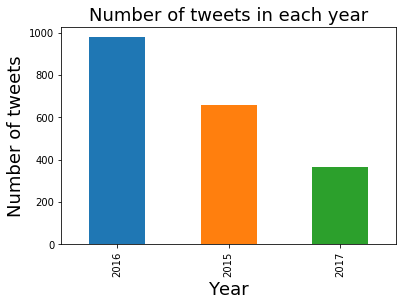

In [102]:
year_freq.plot(x= year_freq.index , y= year_freq, kind='bar')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of tweets", fontsize=18)
plt.title('Number of tweets in each year', fontsize=18)

In [103]:
day_freq = df['day'].value_counts()

Text(0.5,1,'Number of tweets in each week day')

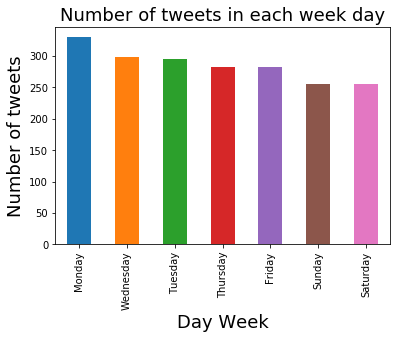

In [104]:
day_freq.plot(x= day_freq.index , y= day_freq, kind='bar')
plt.xlabel("Day Week", fontsize=18)
plt.ylabel("Number of tweets", fontsize=18)
plt.title('Number of tweets in each week day', fontsize=18)

In [105]:
month_freq = df['month'].value_counts()

Text(0.5,1,'Number of tweets in each month')

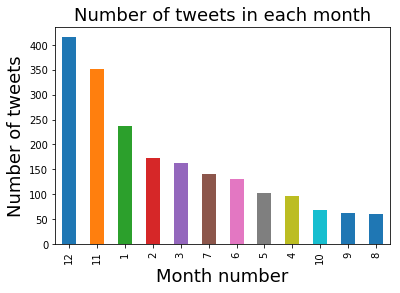

In [106]:
month_freq.plot(x= month_freq.index , y= month_freq, kind='bar')
plt.xlabel("Month number", fontsize=18)
plt.ylabel("Number of tweets", fontsize=18)
plt.title('Number of tweets in each month', fontsize=18)

In [107]:
r_numerator = df['rating_numerator'].value_counts()

Text(0.5,1,'Dog Rates Frequencies')

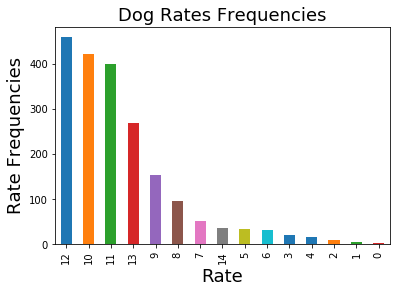

In [108]:
r_numerator.plot(x= r_numerator.index , y= r_numerator, kind='bar')
plt.xlabel("Rate", fontsize=18)
plt.ylabel("Rate Frequencies", fontsize=18)
plt.title('Dog Rates Frequencies', fontsize=18)

In [109]:
dog_stage_p1 = df['p1'].value_counts()

Text(0.5,1,'The most 10 dog stages (p1)')

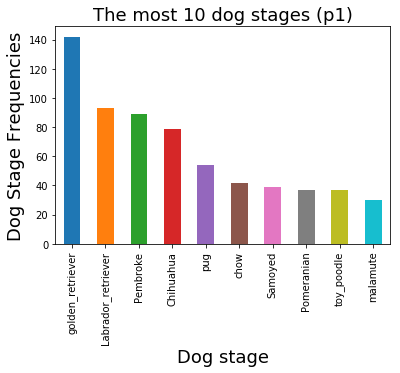

In [110]:
dog_stage_p1.head(10).plot(x= dog_stage_p1.index , y= dog_stage_p1, kind='bar')
plt.xlabel("Dog stage", fontsize=18)
plt.ylabel("Dog Stage Frequencies", fontsize=18)
plt.title('The most 10 dog stages (p1)', fontsize=18)

In [111]:
dog_stage_p2 = df['p2'].value_counts()

Text(0.5,1,'The most 10 dog stages (p2)')

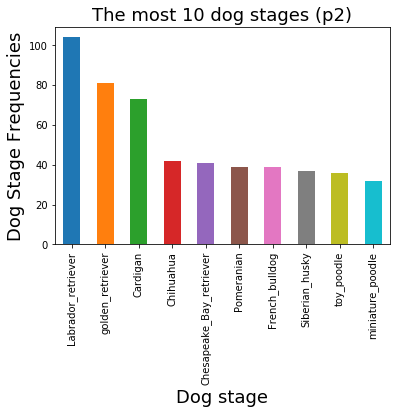

In [112]:
dog_stage_p2.head(10).plot(x= dog_stage_p2.index , y= dog_stage_p2, kind='bar')
plt.xlabel("Dog stage", fontsize=18)
plt.ylabel("Dog Stage Frequencies", fontsize=18)
plt.title('The most 10 dog stages (p2)', fontsize=18)

In [113]:
dog_stage_p3 = df['p3'].value_counts()

Text(0.5,1,'The most 10 dog stages (p3)')

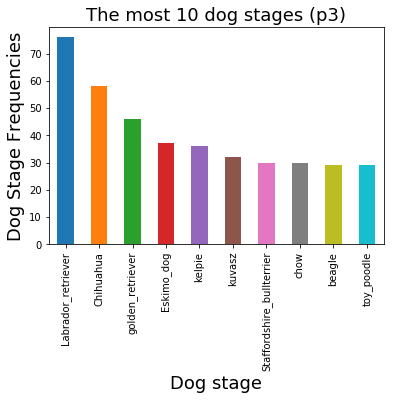

In [114]:
dog_stage_p3.head(10).plot(x= dog_stage_p3.index , y= dog_stage_p3, kind='bar')
plt.xlabel("Dog stage", fontsize=18)
plt.ylabel("Dog Stage Frequencies", fontsize=18)
plt.title('The most 10 dog stages (p3)', fontsize=18)

Text(0.5,1,'Correlation between fav & retweets')

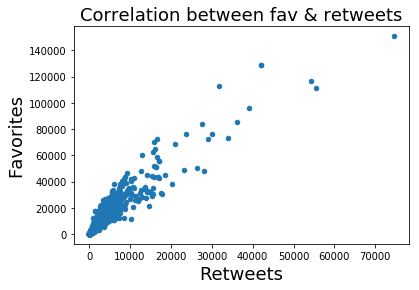

In [115]:
df.plot(x='retweets', y='favorites', kind='scatter')
plt.xlabel("Retweets", fontsize=18)
plt.ylabel("Favorites", fontsize=18)
plt.title('Correlation between fav & retweets', fontsize=18)

Text(0.5,1,'Correlation between fav & rate')

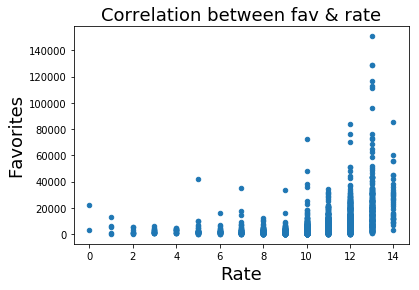

In [116]:
df.plot(x='rating_numerator', y='favorites', kind='scatter')
plt.xlabel("Rate", fontsize=18)
plt.ylabel("Favorites", fontsize=18)
plt.title('Correlation between fav & rate', fontsize=18)

In [117]:
df.corr()

,tweet_id,rating_numerator,rating_denominator,year,month,hour,retweets,favorites,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.525327,NaN,0.882873,-0.307925,0.142706,0.381450,0.601709,0.211629,0.107767,0.124044,-0.002468,0.127781,-0.051914,0.102754
rating_numerator,0.525327,1.000000,NaN,0.492494,-0.217966,0.089627,0.289389,0.380390,0.192853,0.100888,0.284380,0.005250,0.245455,-0.029273,0.229232
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.882873,0.492494,NaN,1.000000,-0.717406,0.089925,0.332660,0.525070,0.204421,0.089624,0.129775,-0.007511,0.124731,-0.037600,0.099313
month,-0.307925,-0.217966,NaN,-0.717406,1.000000,0.026403,-0.107018,-0.171771,-0.100892,-0.022041,-0.078413,0.010503,-0.063444,-0.000350,-0.051050
hour,0.142706,0.089627,NaN,0.089925,0.026403,1.000000,0.047289,0.048967,0.035522,0.006142,0.022134,0.000042,0.036782,-0.009783,0.017998
retweets,0.381450,0.289389,NaN,0.332660,-0.107018,0.047289,1.000000,0.931816,0.098013,0.042961,0.008904,-0.015671,0.020269,-0.039536,0.010297
favorites,0.601709,0.380390,NaN,0.525070,-0.171771,0.048967,0.931816,1.000000,0.120856,0.066346,0.050008,-0.018543,0.059687,-0.049376,0.038880
img_num,0.211629,0.192853,NaN,0.204421,-0.100892,0.035522,0.098013,0.120856,1.000000,0.207664,0.031926,-0.155691,0.054652,-0.143865,0.065940
p1_conf,0.107767,0.100888,NaN,0.089624,-0.022041,0.006142,0.042961,0.066346,0.207664,1.000000,0.123704,-0.512417,0.136626,-0.710960,0.116474
